<a href="https://colab.research.google.com/github/steam-sa/steam-sa/blob/main/Murad_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 142ms/step - accuracy: 0.5181 - loss: 0.6928 - val_accuracy: 0.3125 - val_loss: 0.7203
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.6069 - loss: 0.6465 - val_accuracy: 0.3125 - val_loss: 0.7518
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.8831 - loss: 0.5537 - val_accuracy: 0.5344 - val_loss: 0.6735
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 170ms/step - accuracy: 0.9949 - loss: 0.2955 - val_accuracy: 0.6094 - val_loss: 0.6299
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 1.0000 - loss: 0.0648 - val_accuracy: 0.6500 - val_loss: 0.5966
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 328ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 0.6906 - val_loss: 0.5688
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 231ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.7219 - val_loss: 0.5450
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy

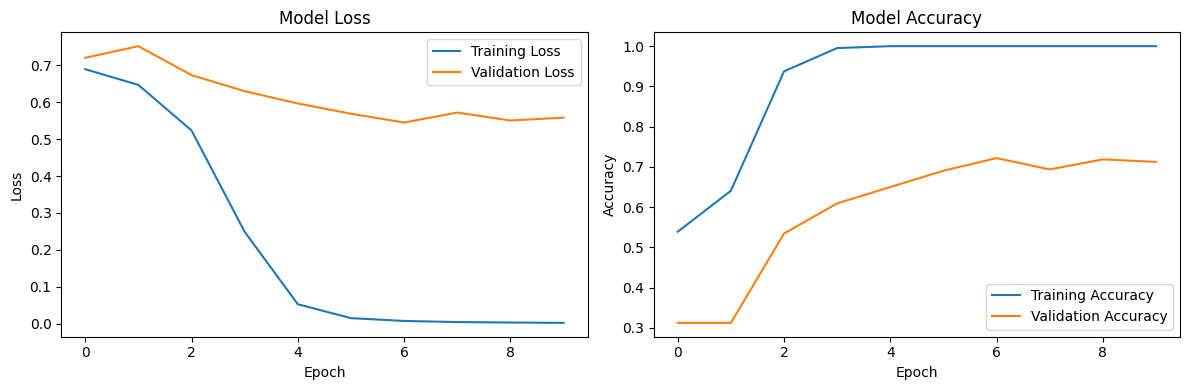

In [ ]:
# Libraries import
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns

# Read both training and test CSV files
train_df = pd.read_csv('train.csv', header=None)
test_df = pd.read_csv('test.csv', header=None)

# Rename columns for clarity
train_df.columns = ['review', 'sentiment']
test_df.columns = ['review', 'sentiment']

# Preprocess the text
def preprocess_text(text):
    # Convert all text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = ''.join([c if c.isalnum() or c.isspace() else ' ' for c in text])
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

# Apply preprocessing to both training and test data
train_df['processed_text'] = train_df['review'].apply(preprocess_text)
test_df['processed_text'] = test_df['review'].apply(preprocess_text)

# Initialize and fit tokenizer on training data only
MAX_WORDS = 10000
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(train_df['processed_text'])

# Convert text to sequences for both training and test data
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['processed_text']), maxlen=500)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['processed_text']), maxlen=500)

y_train = train_df['sentiment'].values
y_test = test_df['sentiment'].values

# Build the CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([Embedding(MAX_WORDS, 100, input_length=500),Conv1D(128, 5, activation='relu'),GlobalMaxPooling1D(),Dense(64, activation='relu'),Dropout(0.3),Dense(1, activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,epochs=10,batch_size=32,validation_split=0.2,verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# If you want to save predictions to a file
predictions_df = pd.DataFrame({'Review': test_df['review'],'Actual Sentiment': y_test,'Predicted Sentiment': y_pred_classes.flatten(),'Prediction Probability': y_pred.flatten()})
predictions_df.to_csv('predictions.csv', index=False)